# 8-pixel DCR

> *This notebook computes the detectors DCR for the two 8-pixel arrays used for the 8-spot smFRET measurements*

## Load software

In [1]:
import phconvert as phc
phc.__version__

'0.4.3'

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale=1.4)

## Load data

In [3]:
fname = 'DCR_test_2.hdf5'
data_dir = './data/2014-02-26/'

In [4]:
full_fname = data_dir + fname

In [5]:
d = phc.hdf5.load_photon_hdf5(full_fname, strict=False)

Photon-HDF5 WARNING: Missing "/setup/num_spots".
Photon-HDF5 WARNING: Missing "/setup/num_spectral_ch".
Photon-HDF5 WARNING: Missing "/setup/num_polarization_ch".
Photon-HDF5 WARNING: Missing "/setup/num_split_ch".
Photon-HDF5 WARNING: Missing "/setup/modulated_excitation".
Photon-HDF5 WARNING: Missing "/setup/lifetime".


## Compute DCR

,Donor DCR,Acceptor DCR
CH,,
0,36.396964,3678.865963
1,116.553640,7203.520196
2,3774.853615,78.159763
3,566.996656,901.414458
4,29.229483,1716.534345
5,442.598405,4320.610497
6,27.127090,48.726782
7,24.438899,53.412143


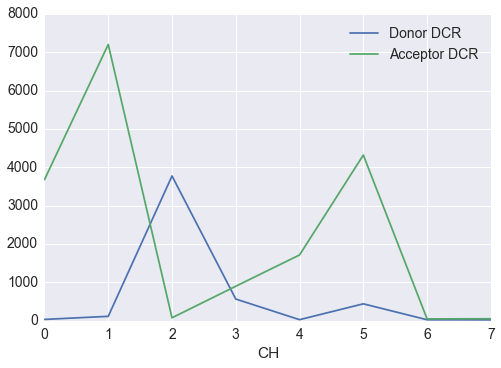

In [6]:
# Compute DCR
A_em = phc.hdf5.photon_data_mapping(d, 'detectors')
A_em = [a.read().view(bool) for a in A_em.values()]
accept_dcr = [a.sum()/d.acquisition_time.read() for a in A_em]
donor_dcr = [(~a).sum()/d.acquisition_time.read() for a in A_em]

# Make a DataFrame
dcr_data = pd.DataFrame(columns = ['Donor DCR', 'Acceptor DCR'])
dcr_data['Donor DCR'] = donor_dcr
dcr_data['Acceptor DCR'] = accept_dcr
dcr_data.index.name = 'CH'

# Output plot and tables
dcr_data.plot()
dcr_data

## Save results

In [7]:
dcr_data.to_csv('results/8-pixels_DCR.txt')

In [8]:
pd.read_csv('results/8-pixels_DCR.txt', index_col=0)

,Donor DCR,Acceptor DCR
CH,,
0,36.396964,3678.865963
1,116.553640,7203.520196
2,3774.853615,78.159763
3,566.996656,901.414458
4,29.229483,1716.534345
5,442.598405,4320.610497
6,27.127090,48.726782
7,24.438899,53.412143


## Other

In [9]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
-------------------------------------------------------------
 You are running FRETBursts (version 0.4rc10-7-gb2e1b5d).

 If you use this software in a publication, please cite it as:

   FRETBursts - An opensource single-molecule FRET bursts analysis toolkit.
   A. Ingargiola 2014. https://github.com/tritemio/FRETBursts

-------------------------------------------------------------


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [10]:
def compute_dcr(d):
    # Compute DCR
    accept_dcr = [a.sum()/(d.time_max - d.time_min) for a in d.A_em]
    donor_dcr = [(~a).sum()/(d.time_max - d.time_min) for a in d.A_em]

    # Make a DataFrame
    dcr_data = pd.DataFrame(columns = ['Donor DCR', 'Acceptor DCR'])
    dcr_data['Donor DCR'] = donor_dcr
    dcr_data['Acceptor DCR'] = accept_dcr
    dcr_data.index.name = 'CH'
    return dcr_data

In [11]:
d = phc.hdf5.load_photon_hdf5(full_fname, strict=False)

Photon-HDF5 WARNING: Missing "/setup/num_spots".
Photon-HDF5 WARNING: Missing "/setup/num_spectral_ch".
Photon-HDF5 WARNING: Missing "/setup/num_polarization_ch".
Photon-HDF5 WARNING: Missing "/setup/num_split_ch".
Photon-HDF5 WARNING: Missing "/setup/modulated_excitation".
Photon-HDF5 WARNING: Missing "/setup/lifetime".


In [12]:
d = loader.photon_hdf5(full_fname)

Photon-HDF5 WARNING: Missing "/setup/num_spots".
Photon-HDF5 WARNING: Missing "/setup/num_spectral_ch".
Photon-HDF5 WARNING: Missing "/setup/num_polarization_ch".
Photon-HDF5 WARNING: Missing "/setup/num_split_ch".
Photon-HDF5 WARNING: Missing "/setup/modulated_excitation".
Photon-HDF5 WARNING: Missing "/setup/lifetime".


In [13]:
d_small = d.slice_ph(time_s2=30)

In [14]:
dcr_small = compute_dcr(d_small)
dcr_small

,Donor DCR,Acceptor DCR
CH,,
0,36.233338,3734.400448
1,116.033347,7282.700874
2,3774.933786,144.266684
3,571.066735,971.800117
4,28.966670,1775.133546
5,447.533387,4375.567192
6,28.033337,120.600014
7,23.766670,126.433349


In [15]:
print 'Percentace DCR change:'
100*(dcr_small - dcr_data)/dcr_data

Percentace DCR change:


,Donor DCR,Acceptor DCR
CH,,
0,-0.449561,1.509554
1,-0.446398,1.099194
2,0.002124,84.579223
3,0.717831,7.808357
4,-0.899136,3.413809
5,1.115002,1.271966
6,3.340743,147.502524
7,-2.750653,136.712742


In [16]:
#d.calc_bg(fun=fb.bg.raw_fit, time_s=30)

In [17]:
#%matplotlib qt

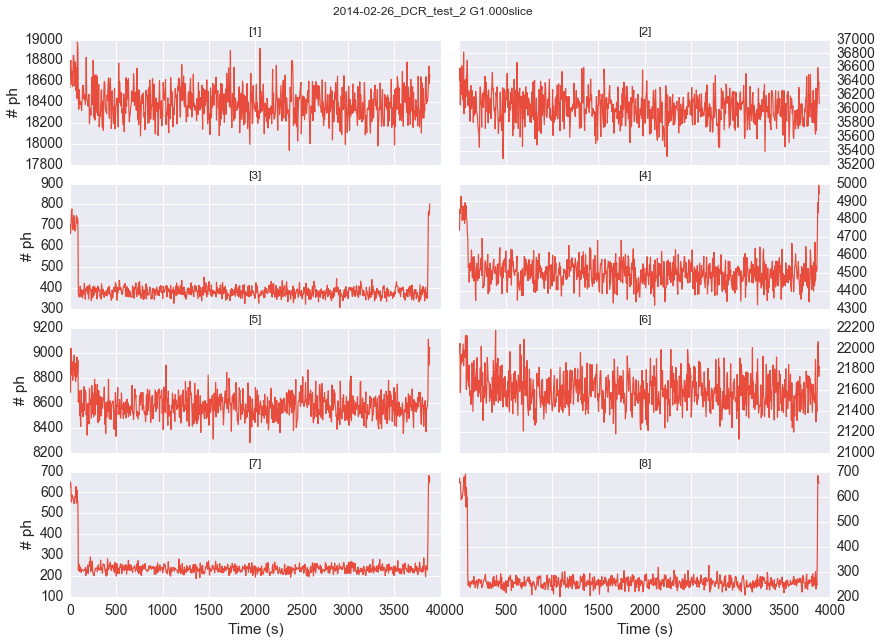

In [18]:
Ax = dplot(d, timetrace_single, ph_sel=Ph_sel(Dex='Aem'), binwidth=5, 
           tmax=None, show_rate_th=False, sharey=False, set_ax_limits=False)